# Check out 3D Gaussians

Necessary imports:

In [1]:
import sys 
sys.path.append('..')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import get_field_data as gfd

Point to the directories, where the data lie.

Here is a gathering of simulations with varying parameters in order to show some effects appearing in larger simulations.

In [3]:
# Data path
scratch_dir = "/project/th-scratch/a/And.Lindner"

# Data folder
folder1 = "3d_gaussian"  # 128 prc, bulky wave, initial step
folder2 = "3d_gaussian_full"  # 128 prc, smaller wavelength, overlap and final state

folder3 = "3d_gaussian_lowres"  # 1 prc with initial state
folder4 = "3d_gaussian_lowres_full"  # 1 prc with overlap and final state

folder5 = "3d_gaussian_8prc" # 8 prc with initial step 
folder6 = "3d_gaussian_8prc_full" # 8 prc with overlap and final state

0. Specify the file path.

1. Define which field component you want to have.
0 is $E_x$, 1 is $E_y$, 2 is $E_z$, 3 is $B_x$, etc.
Here it is always the $E_z$ component.

2. Define which step you want to get.
The available output steps were defined in your simulation and name the prefix of the output files. 

3. Give the number of processes/patches used in the simulation.

4. Indicate the slicing of the patchwork in the two dimensions.

5. Give the shape of a patch in lattice points.

Then load the chosen data into a variable.  
Again, this is very simple by just passing the parameters to the convenience function of the provided module.  
Multiple steps can be read-in directly using the `combine_steps` wrapper provided in the [get_field_data](../get_field_data.py) module as is shown e.g. in the [1d_plane](1d_plane.ipynb) notebook.  
3D data is however often too large and processing time steps sequentially can be advantageous.

MPI-capable visualization tools like [Paraview](https://www.paraview.org/) could be considered.

In [4]:
# Ez component is third (same for all the data here)
component=2

### 1 process/patch

Here we have Gaussian waves that are quite bulky (large wavelength) in order to be accurately simulated on one core in a 80x80x80 points box.

Different states (time steps) are available.

In [5]:
path = os.path.join(scratch_dir,folder3)
step=1
n_prc=list(range(1))
n_patches=[1,1,1]
patch_shape=[80,80,80]

In [6]:
ez=gfd.get_field3D(path,component,n_prc,patch_shape,n_patches,step)

In [7]:
ez.shape

(80, 80, 80)

There are good values around 10$\mu m$, which is the vertical center of the pulses.

An initial step in 2D:

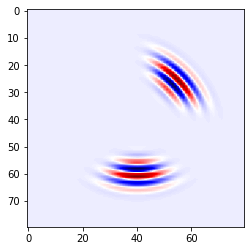

In [8]:
ezs = ez[:,:,10]
plt.imshow(ezs, cmap="seismic")

Overlap and asymptotic state shown for various vertical heights:

In [9]:
path = os.path.join(scratch_dir,folder4)
steps=[50,100]

In [10]:
ez=gfd.combine_steps(gfd.get_field3D,path,component,n_prc,patch_shape,n_patches,steps=steps)

In [ ]:
sh_0, sh_1 = ez[0][:,:,10].shape
x, y = np.linspace(-40, 40, sh_0), np.flip(np.linspace(-40, 40, sh_1))
z01=ez[0][:,:,10]
z02=ez[0][:,:,5]
z03=ez[0][:,:,2]
z11=ez[1][:,:,10]
z12=ez[1][:,:,5]
z13=ez[1][:,:,2]

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Overlap State', 'Asymptotic State'],
                    )

fig.add_trace( go.Surface(z=z01, x=x, y=y, showscale=False, opacity=0.3,colorscale='Plotly3'),1,1)
fig.add_trace( go.Surface(z=z02-0.1, x=x, y=y, showscale=False, opacity=0.3,colorscale='Plotly3'),1,1)
fig.add_trace( go.Surface(z=z03-0.15, x=x, y=y, showscale=False, opacity=0.3,colorscale='Plotly3'),1,1)

fig.add_trace( go.Surface(z=z11, x=x, y=y, showscale=False, opacity=0.3,colorscale='Turbo'),1,2 )
fig.add_trace( go.Surface(z=z12-0.1, x=x, y=y, showscale=False, opacity=0.3,colorscale='Turbo'),1,2 )
fig.add_trace( go.Surface(z=z13-0.15, x=x, y=y, showscale=False, opacity=0.3,colorscale='Turbo'),1,2 )


fig.update_layout(title=r'$\text{Vertical heights: }10\mu m \, , \ 5\mu m \, , \ 2.5\mu m $',
                  autosize=False,
                  width=1000, height=500,
                  margin=dict(l=100, r=50, b=65, t=90),
                  scene=dict(zaxis=dict(ticks=""))
                 )
fig.show()

Interactive plotly plots are very resource intensive.
Here an image snapshot was saved.
The quality is not that good.

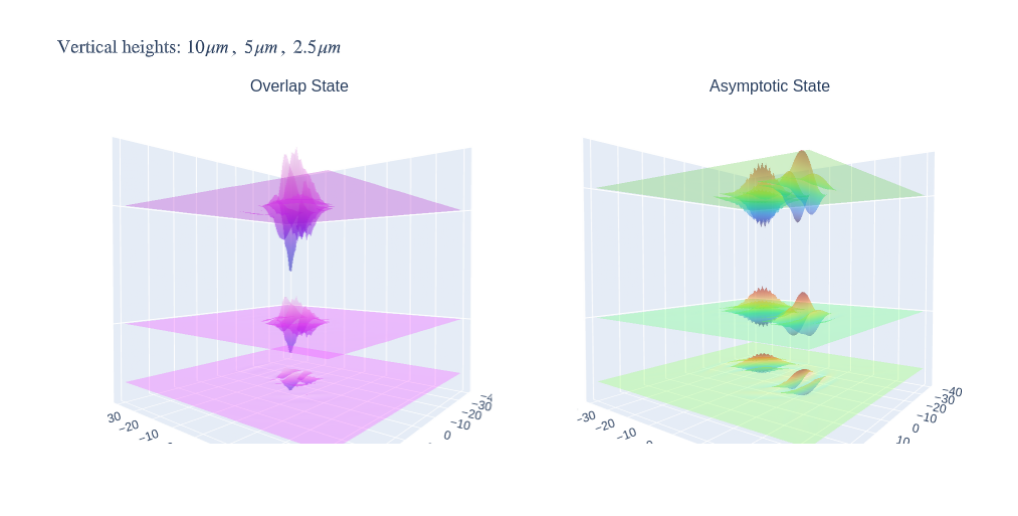

In [15]:
img = mpimg.imread("plotly_plots/gauss3d_wide.png")
plt.figure(figsize=(18,11))
plt.axis('off')
plt.imshow(img)
plt.show()

### 8 processes/patches

Same data as above but simulated on multiple (8) cores.

In [26]:
path = os.path.join(scratch_dir,folder5)
step=1
n_prc=list(range(0,8))
n_patches=[2,2,2]
patch_shape=[40,40,40]

In [27]:
ez=gfd.get_field3D(path,component,n_prc,patch_shape,n_patches,step)

Plotting...

Further steps:

In [30]:
path = os.path.join(scratch_dir,folder6)
steps=[50,100]

In [31]:
ez=gfd.combine_steps(gfd.get_field3D,path,component,n_prc,patch_shape,n_patches,steps=steps)

Plotting...

This gives the same results as above.

### 128 processes/patches

A large number of cores is required in order so simulate Gaussians as the are used, e.g., for our simple high-harmonic generation analyses.

In [32]:
path = os.path.join(scratch_dir,folder1)
step=1
n_prc=list(range(0,128))
n_patches=[8,8,2]
patch_shape=[100,100,100]

In [20]:
ez=gfd.get_field3D(path,component,n_prc,patch_shape,n_patches,step)

In [21]:
ez.shape

(800, 800, 200)

Index 100 here corresponds to $10\mu m$ which is the vertical center of the pulses.  

An initial step with a bulky wave as above:

In [50]:
ezs=ez[:,:,100]

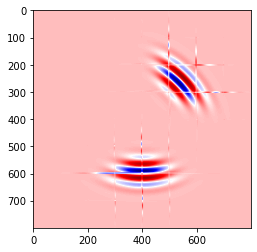

In [51]:
plt.imshow(ezs, cmap="seismic")

Too bulky waves (too  large wavelength) can cause communication problems when the halo depth is not deep enough. This may cause a blurring over time.

Further steps are simulated with finer (smaller wavelength) waves.

In [33]:
path = os.path.join(scratch_dir,folder2)
steps=[50,100]

In [34]:
ez=gfd.combine_steps(gfd.get_field3D,path,component,n_prc,patch_shape,n_patches,steps=steps)

In [ ]:
sh_0, sh_1 = ez[0][:,:,100].shape
x, y = np.linspace(-40, 40, sh_0), np.flip(np.linspace(-40, 40, sh_1))
z01=ez[0][:,:,100]
z02=ez[0][:,:,50]
z03=ez[0][:,:,25]
z11=ez[1][:,:,100]
z12=ez[1][:,:,50]
z13=ez[1][:,:,25]

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Overlap State', 'Asymptotic State'],
                    )

fig.add_trace( go.Surface(z=z01, x=x, y=y, showscale=False, opacity=0.3,colorscale='Plotly3'),1,1)
fig.add_trace( go.Surface(z=z02-0.1, x=x, y=y, showscale=False, opacity=0.3,colorscale='Plotly3'),1,1)
fig.add_trace( go.Surface(z=z03-0.15, x=x, y=y, showscale=False, opacity=0.3,colorscale='Plotly3'),1,1)

fig.add_trace( go.Surface(z=z11, x=x, y=y, showscale=False, opacity=0.3,colorscale='Turbo'),1,2 )
fig.add_trace( go.Surface(z=z12-0.1, x=x, y=y, showscale=False, opacity=0.3,colorscale='Turbo'),1,2 )
fig.add_trace( go.Surface(z=z13-0.15, x=x, y=y, showscale=False, opacity=0.3,colorscale='Turbo'),1,2 )


fig.update_layout(title=r'$\text{Vertical heights: }10\mu m \, , \ 5\mu m \, , \ 2.5\mu m $',
                  autosize=False,
                  width=1000, height=500
                  #margin=dict(l=65, r=50, b=65, t=90))
                 )
fig.show()

Interactive plotly plots are very resource intensive.
Here an image snapshot was saved.
The quality is not that good.

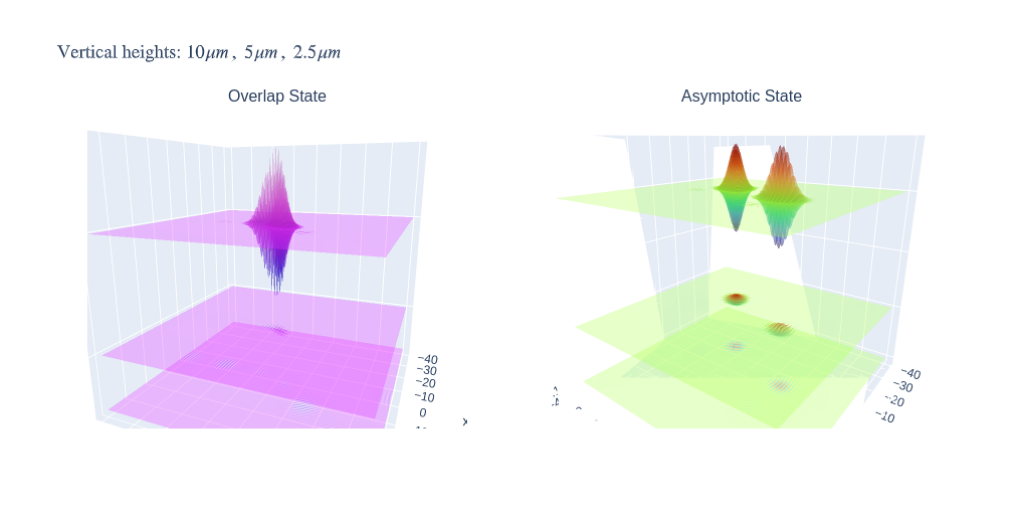

In [14]:
img = mpimg.imread("plotly_plots/gauss3d_narrow.png")
plt.figure(figsize=(18,11))
plt.axis('off')
plt.imshow(img)
plt.show()

In the vertical ends there are wave remnants flying around due to dispersion effects and because of reflection due to periodic boundaries.  
The amplitudes are however very tiny.  
Here, the bottom z-slice of the simulation for the overlap state (it is of corse more crowded in later steps):

In [44]:
ezs = ez[0][:,:,0]

These are, however, quite small:

In [46]:
ezs.max()

4.3493797199131895e-05

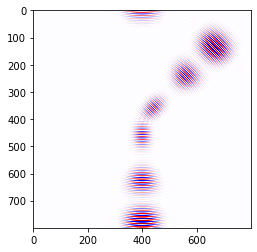

In [47]:
plt.imshow(ezs, cmap="seismic")